# 38. Decision Tree (Classification) (Practical)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv(r'Data/Social_Network_Ads_2.csv')
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


### To see how splitting is taking place through graph

- Decision tree is non-linear algorithm

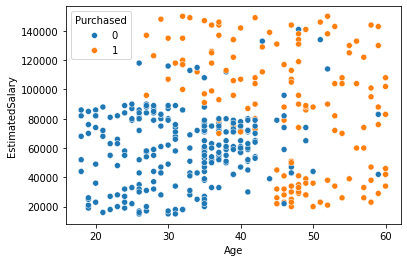

In [33]:
sns.scatterplot(x="Age", y="EstimatedSalary", data=dataset, hue="Purchased")
plt.show()

- So this is non-linear graph

### Step 1: Check for missing data

In [4]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Step 2: Split the data into dependent and independent variables

In [5]:
x = dataset.iloc[:,:-1]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [6]:
y = dataset['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

### Step 3: Do scaling of data

In [7]:
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


Scaling is needed b/c there is huge difference between values of Age and EstimatedSalary. So there is need to do scaling of data before model building

In [8]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
sc.fit(x)
# Next step will transform (sc.transform(x)) the data and will convert into dataframe
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [13]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


**Now our has been scalled**

### Step 3: Split the data into train and test dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Step 4: Build Model through Decision Tree

- Decision tree can work for both classification through **DecisionTreeClassifier** or for regression through **DecisionTreeRegressor**
- As our output (dataset['Purchased']) consists of 0 and 1 form, so DecisionTreeClassifier will be used

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
# default: DecisionTreeClassifier(criterion='gini')
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

### Step 5: Check Accuracy of Built Model

In [20]:
dt.score(x_test, y_test)*100

83.75

### Step 6: Perform Predictions on Built Model

In [22]:
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [23]:
dt.predict([[19,19000]])

C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**It gave wrong prediction**

In [24]:
dt.predict([[35,20000]])

C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**again wrong prediction**

### Step 7: Analysis of Model through Graph

In [25]:
from sklearn.tree import plot_tree

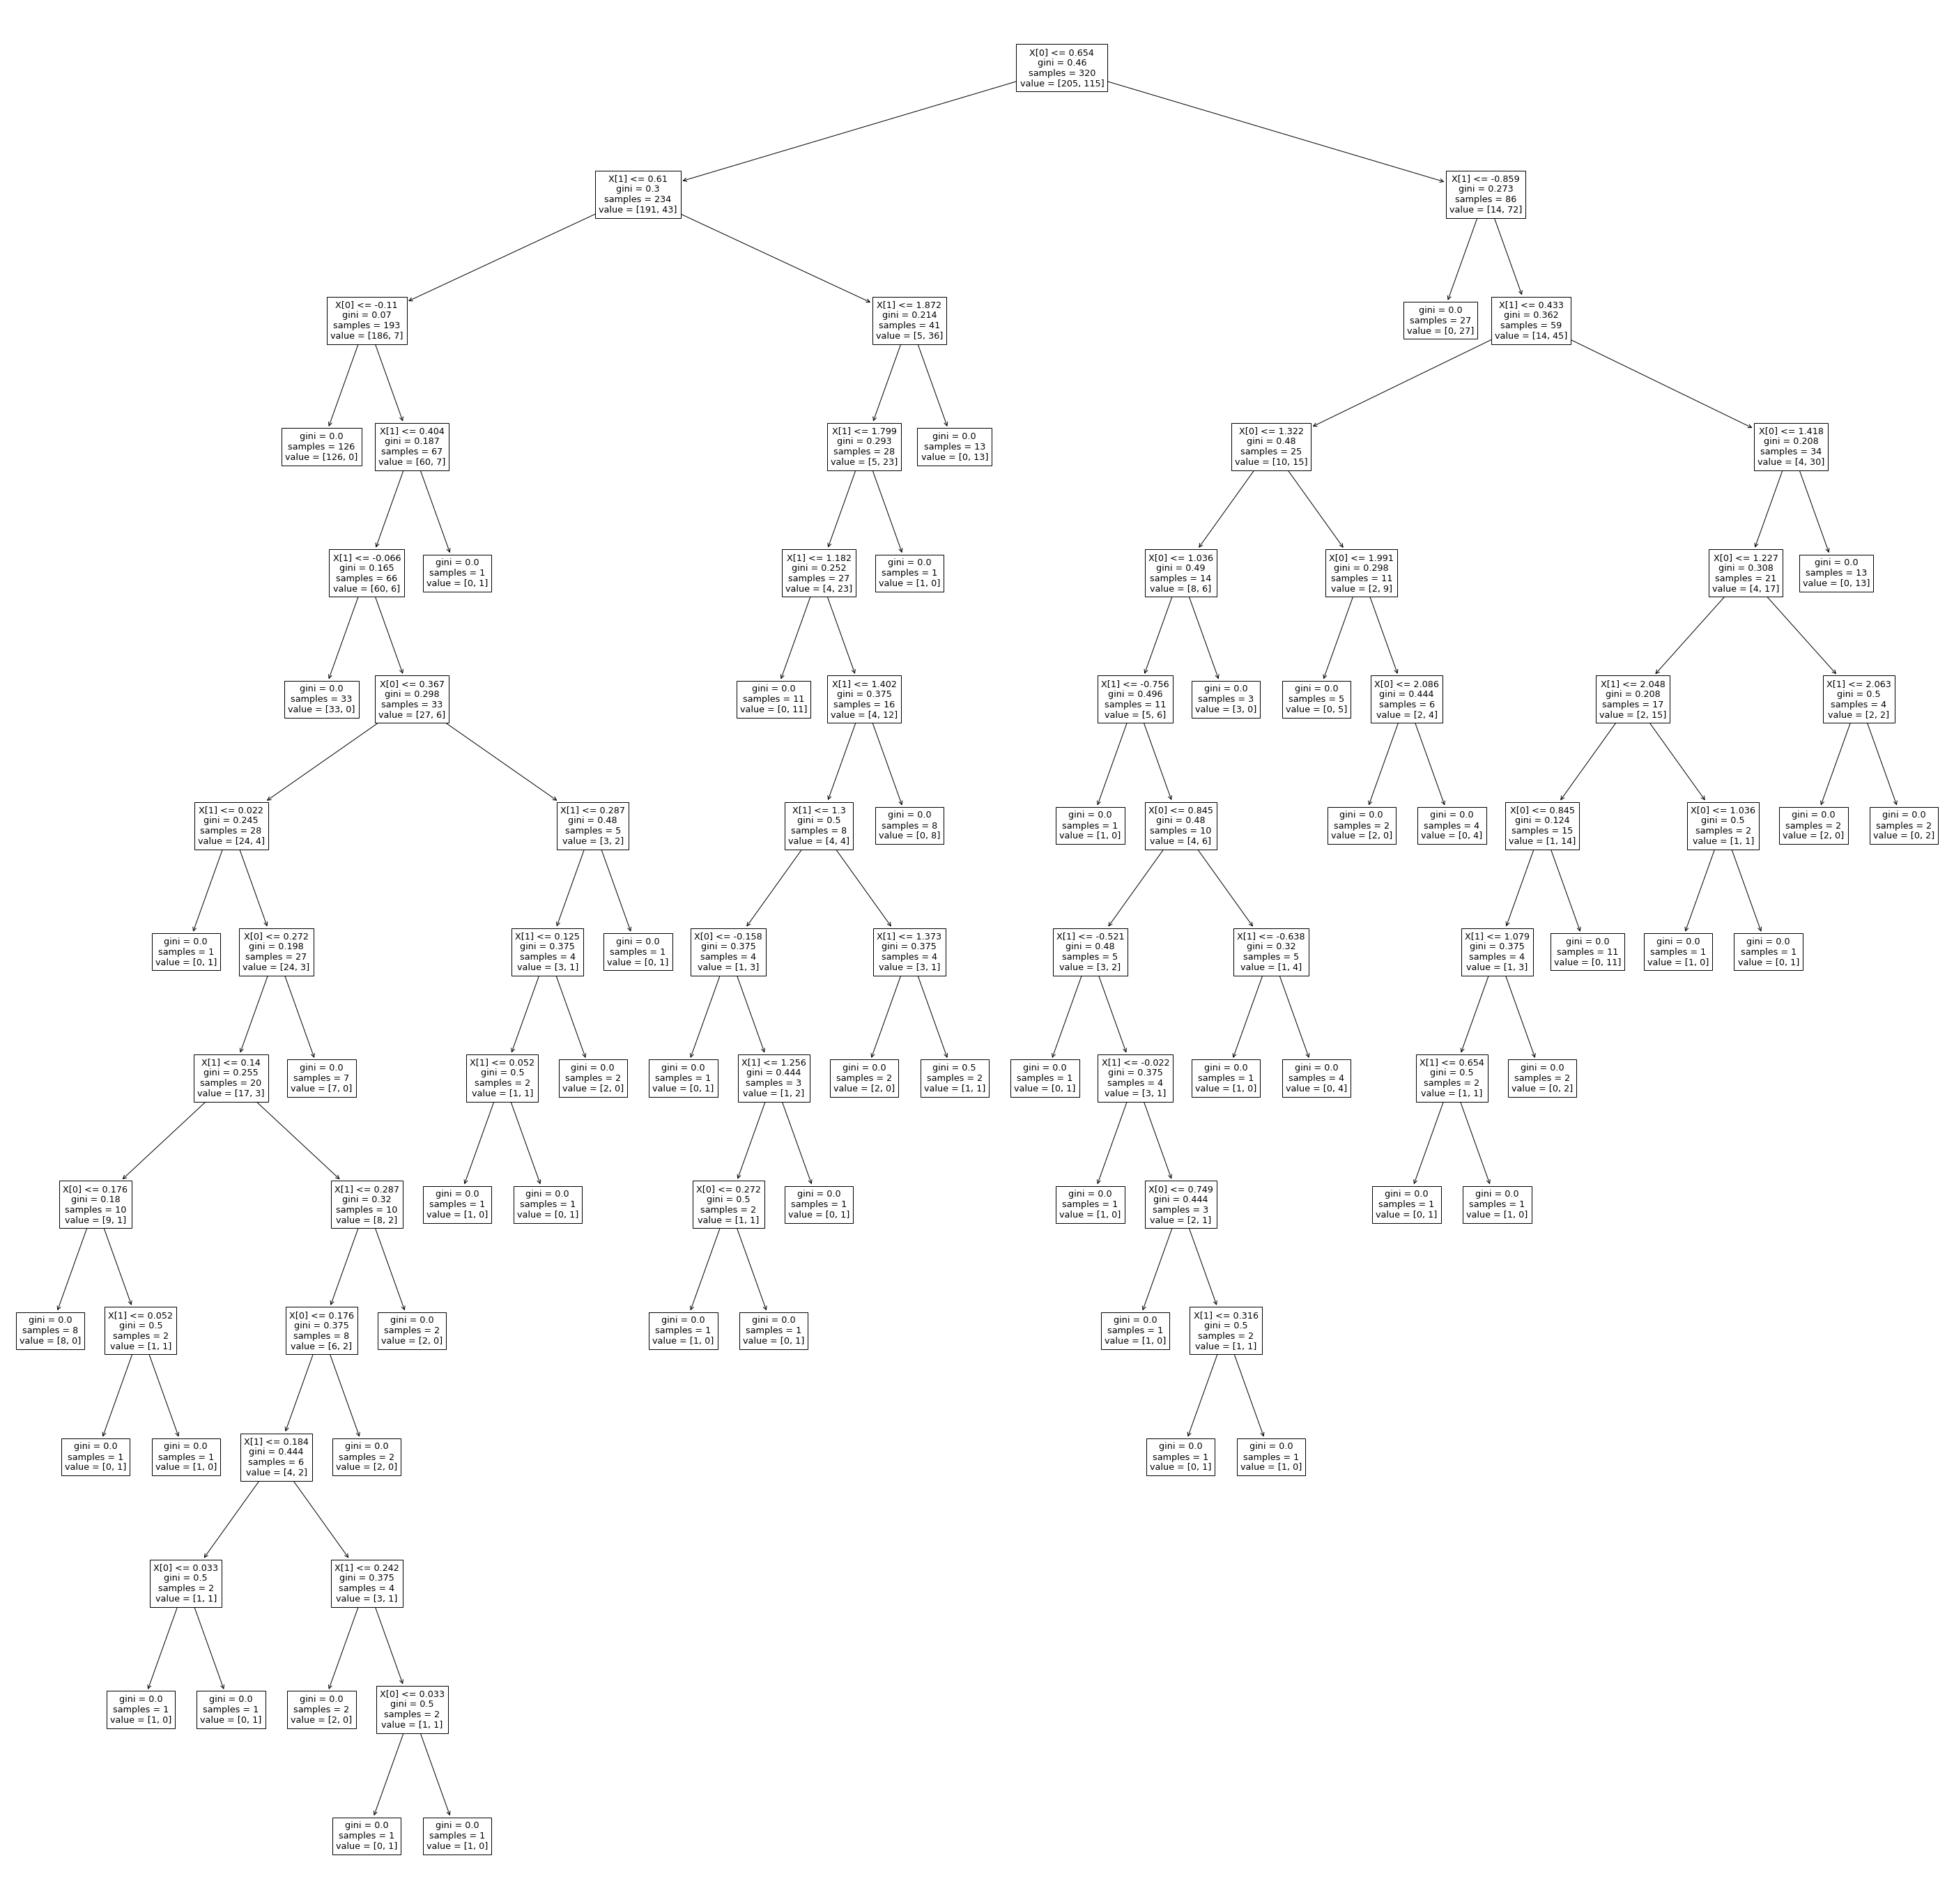

In [29]:
# plot_tree(decision_tree)
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig(r'Generated_images/decision-tree-demo.jpg')
plt.show()

### Step 8: Visualize Decision Tree Boundaries (How decision tree was split)

- We used CART algorithm, which will split the data in binary
- 

## Make Model through Entropy 

In [30]:
# default: DecisionTreeClassifier(criterion='gini')
dt1 = DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
dt1.score(x_test, y_test)*100

83.75

- No difference was found between model built by gini and entropy

### To see Non-linear line splitting

In [35]:
from mlxtend.plotting import plot_decision_regions

C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


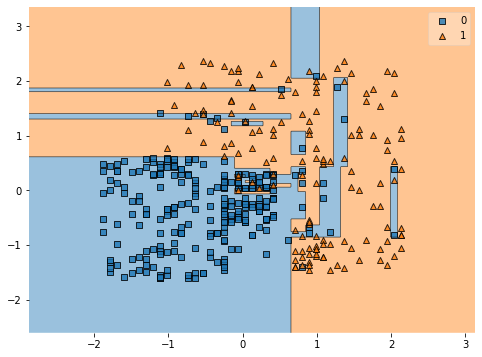

In [40]:
plt.figure(figsize=(8,6))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


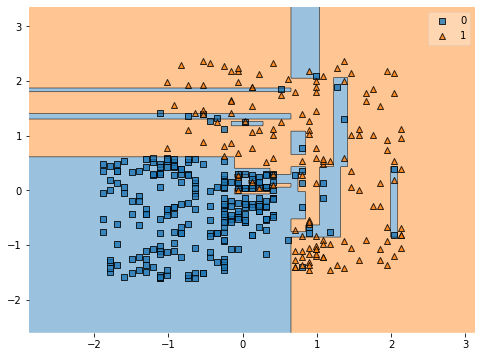

In [41]:
plt.figure(figsize=(8,6))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()